## ANÁLISIS

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np

### 1. Análisis del dataset de train

In [8]:
data_train = pd.read_csv("../data/train.csv", encoding='cp1252')
data_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.53,Very Good,G,SI1,63.4,54.0,5.09,5.13,3.24,7.057
1,1,0.41,Ideal,D,SI1,63.0,56.0,4.80,4.75,3.01,6.824
2,2,0.32,Ideal,I,VS2,61.6,56.0,4.37,4.39,2.70,6.107
3,3,0.31,Ideal,H,VVS2,61.2,56.0,4.34,4.37,2.66,6.390
4,4,1.35,Premium,J,VS2,60.5,56.0,7.19,7.12,4.33,8.741


In [10]:
data_train.shape

(40455, 11)

In [11]:
data_train.keys()

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [12]:
data_train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

* Vemos que no hay ningún valor nulo por lo que NO tendremos que realizar ninguno de los siguientes procesos:
    1. Elminar columnas con valores nulos excesivos
    2. Eliminar filas con algunos valores nulos
    3. Reemplazar los valores nulos por la media, mediana o moda

In [14]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


* Aquí podemos ver que hay 3 variables categóticas:
    1. cut
    2. color
    3. clarity

<AxesSubplot:xlabel='price', ylabel='Count'>

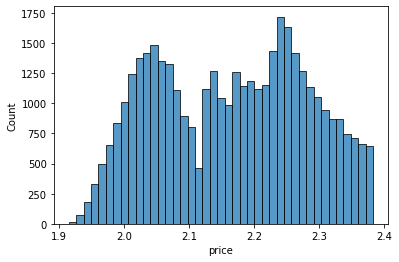

In [24]:
# CREO QUE ESTO ES MAS PARA ANALIZAR EL MODELO DE ESTANDARIZACION ALOMJEOR BORRAR DE AQUI
sns.histplot(np.log1p(data_train.price))

* Con esta gráfica podemos observar que el predio de los diamantes sí se ve afectado por diferentes variables
* Ahora hay que averiguar que variables afectan más o menos al precio del diamante, es decir cuales hacen eu que precio aumente y cuales hacen que el precio disminuya

In [25]:
data_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.53,Very Good,G,SI1,63.4,54.0,5.09,5.13,3.24,7.057
1,1,0.41,Ideal,D,SI1,63.0,56.0,4.80,4.75,3.01,6.824
2,2,0.32,Ideal,I,VS2,61.6,56.0,4.37,4.39,2.70,6.107
3,3,0.31,Ideal,H,VVS2,61.2,56.0,4.34,4.37,2.66,6.390
4,4,1.35,Premium,J,VS2,60.5,56.0,7.19,7.12,4.33,8.741


In [26]:
data_train.clarity.unique()

array(['SI1', 'VS2', 'VVS2', 'SI2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

### 2. Análisis del dataset de test

In [9]:
data_test = pd.read_csv("../data/test.csv", encoding='cp1252')
data_test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74
1,1,0.41,Ideal,E,VS2,61.8,54.0,4.79,4.76,2.95
2,2,0.91,Very Good,E,SI2,62.5,59.0,6.16,6.23,3.87
3,3,0.42,Very Good,G,VS2,62.6,57.0,4.76,4.80,2.99
4,4,0.54,Ideal,G,IF,61.5,56.0,5.28,5.25,3.24
